# Lending Club Data Analysis

## The analysis is seggregated into four parts:
* Understanding Data
* Data cleansing
* Analyzing the Data
* Recommendations or insights

In [161]:
# Import required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

# Understanding the data

In [162]:
#Reading the csv file
loan_df = pd.read_csv('loan.csv',encoding = "ISO-8859-1")

In [163]:
#Check the shape of the loan dataframe
loan_df.shape

(39717, 111)

In [165]:
#check the first five rows
#loan_df.head

In [166]:
#checking dataframe properties
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [167]:
#setting display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [168]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [169]:
# Checking the percentage of missing values for each field
round(loan_df.isnull().sum()/len(loan_df.index), 2)*100

id                                0.0  
member_id                         0.0  
loan_amnt                         0.0  
funded_amnt                       0.0  
funded_amnt_inv                   0.0  
term                              0.0  
int_rate                          0.0  
installment                       0.0  
grade                             0.0  
sub_grade                         0.0  
emp_title                         6.0  
emp_length                        3.0  
home_ownership                    0.0  
annual_inc                        0.0  
verification_status               0.0  
issue_d                           0.0  
loan_status                       0.0  
pymnt_plan                        0.0  
url                               0.0  
desc                              33.0 
purpose                           0.0  
title                             0.0  
zip_code                          0.0  
addr_state                        0.0  
dti                               0.0  


# Data Cleansing

## Filtering data based on condition

In [170]:
# Retaining only relevant data by applying filter condition: loan status != Current
loan_df = loan_df[loan_df.loan_status != 'Current']
loan_df.reset_index(drop=True,inplace=True)

In [171]:
# Checking the fields having more than 60% missing values
missing_columns_values = loan_df.columns[100*(loan_df.isnull().sum()/len(loan_df.index)) > 60]
print(missing_columns_values)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [172]:
# Dropping the fields having missing values more than 60%
loan_df = loan_df.drop(missing_columns_values, axis=1)

# Dropping insignificant fields like id, desc, url, title, member_id
loan_df.drop(columns=['id','member_id','desc','url','title'],inplace=True)

In [173]:
#checking how many unique values are there in each column
loan_df.nunique().sort_values()

tax_liens                     1    
delinq_amnt                   1    
chargeoff_within_12_mths      1    
acc_now_delinq                1    
application_type              1    
policy_code                   1    
collections_12_mths_ex_med    1    
out_prncp_inv                 1    
out_prncp                     1    
initial_list_status           1    
pymnt_plan                    1    
term                          2    
loan_status                   2    
pub_rec_bankruptcies          3    
verification_status           3    
pub_rec                       5    
home_ownership                5    
grade                         7    
inq_last_6mths                9    
delinq_2yrs                   11   
emp_length                    11   
purpose                       14   
sub_grade                     35   
open_acc                      40   
addr_state                    50   
issue_d                       55   
total_acc                     82   
last_pymnt_d                

In [174]:
# Dropping fields with only one unique value
nunique = loan_df.nunique()
fields_to_drop = nunique[nunique == 1].index
loan_df.drop(fields_to_drop, axis=1,inplace=True)
loan_df.columns.size

38

In [175]:
# checking the dataframe share post cleansing
print(loan_df.shape)

(38577, 38)


In [176]:
# Verifying the percentage of missing values post cleanup
round(loan_df.isnull().sum()/len(loan_df.index), 2)*100

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  6.0
emp_length                 3.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveri

In [177]:
# Analysing the columns
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

### Fixing Data types

In [178]:
# Removing % and converting int_rate to float type
loan_df.int_rate=loan_df.int_rate.astype(str).str.rstrip('%').astype('float')

# Converting fields to numeric type
numeric_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loan_df[numeric_cols] = loan_df[numeric_cols].apply(pd.to_numeric)

In [179]:
# Converting issue date to date time type
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')

loan_df['issue_d_month'] = loan_df['issue_d'].dt.month
loan_df['issue_d_year'] = loan_df['issue_d'].dt.year

In [180]:
# Checking the data types post conversion
loan_df.dtypes

loan_amnt                  int64         
funded_amnt                int64         
funded_amnt_inv            float64       
term                       object        
int_rate                   float64       
installment                float64       
grade                      object        
sub_grade                  object        
emp_title                  object        
emp_length                 object        
home_ownership             object        
annual_inc                 float64       
verification_status        object        
issue_d                    datetime64[ns]
loan_status                object        
purpose                    object        
zip_code                   object        
addr_state                 object        
dti                        float64       
delinq_2yrs                int64         
earliest_cr_line           object        
inq_last_6mths             int64         
open_acc                   int64         
pub_rec                    int64  

In [181]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year'],
      dtype='object')

### From above list of columns, we observe there are customer behavior variables which do not impact our target variable i.e. loan status in predicting credit approval, as they do not apply at the time of loan application.
### Hence, we are removing them from further analysis

In [182]:
# Dropping customer behaviour variables
loan_df.drop(['collection_recovery_fee', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',  'recoveries', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee'], axis=1, inplace=True)

# Checking shape
loan_df.shape

(38577, 22)

In [183]:
# Checking the term values
loan_df["term"].unique()


array([' 36 months', ' 60 months'], dtype=object)

In [184]:
# Removing the empty space in term values
loan_df["term"] = loan_df.term.str.strip()
loan_df.term.unique()

array(['36 months', '60 months'], dtype=object)

### Fixing Outliners

<AxesSubplot:xlabel='annual_inc'>

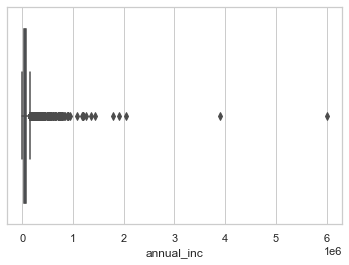

In [185]:
# Analysing outliers in annual_inc using boxplot
sbn.boxplot(loan_df['annual_inc'])

In [186]:
# Understanding annual inc using describe

loan_df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [187]:
# Checking in quantiles
loan_df.annual_inc.quantile([0.90, 0.95, 0.97,0.98,0.99])

0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [192]:
# There is a skewness we can observe above 95 quantile which implies outliners, hence remove them
quantile95 = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= quantile95]

<AxesSubplot:xlabel='annual_inc'>

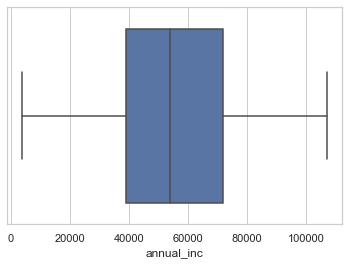

In [193]:
# Reverifying the annual inc using boxplot
sbn.boxplot(loan_df['annual_inc'])

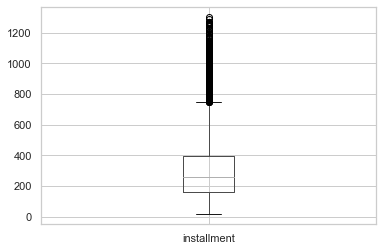

In [201]:
# Analysing outliers in installment using boxplot
loan_df.boxplot(column=['installment']);

In [203]:
# Checking in quantiles
loan_df.installment.quantile([0.90, 0.95, 0.97,0.98,0.99])

0.90    559.2730
0.95    676.7325
0.97    773.3886
0.98    818.5000
0.99    874.6600
Name: installment, dtype: float64

In [207]:
# Removing values from "installment" after 95 percentile
loan_df = loan_df[loan_df["installment"] < loan_df["installment"].quantile(0.95)]
loan_df["installment"].describe()

count    31483.000000
mean     265.861939  
std      142.888553  
min      15.690000   
25%      154.700000  
50%      245.970000  
75%      361.920000  
max      628.860000  
Name: installment, dtype: float64

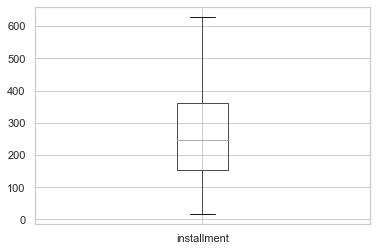

In [208]:
# Reverifying outliers in installment using boxplot
loan_df.boxplot(column=['installment']);

Above boxplot post cleansing do not show any outliners

## Creating Derived Variables

In [194]:
# Creating new fields as month and year from issue_d field
loan_df["issue_d_year"] = loan_df.issue_d.dt.year
loan_df['issue_d_month'] = loan_df.issue_d.dt.strftime('%b')


In [195]:
# Deriving the percentage of loan amount approved from fields funded_amt_inv and loan_amt

loan_df['percentage_loan_amt_approved'] = round(loan_df.funded_amnt_inv*100/loan_df.loan_amnt,2)

### For better analysis of the fields, we bin the numeric fields into sizeable buckets

In [197]:
# Bin loan amounts into sizeable buckets helpful for analysis
loan_df['loan_amnt_bin'] = pd.cut(loan_df['loan_amnt'], [0, 6000, 12000, 18000, 24000, 30000], labels=['0-6000', '6000-12000', '12000-18000', '18000-24000', '24000 +'])

# Bin annual incomes into sizeable buckets helpful for analysis
loan_df['annual_inc_bin'] = pd.cut(loan_df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# Bin intrest rates into sizeable buckets helpful for analysis
loan_df['int_rate_bin'] = pd.cut(loan_df['int_rate'], [5, 10, 15, 20], labels=['5-10', '10-15', '15-20'])

# Bin dti into sizeable buckets helpful for analysis
loan_df['dti_bin'] = pd.cut(loan_df['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5', '05-10', '10-15', '15-20', '20-25','25-30'])

In [199]:
# Creating a new numeric field to determine the loan status as 1 for defaulted and 0 otherwise

loan_df['loan_status_count'] = loan_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [200]:
# Checking the creation of dervied fields
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year,percentage_loan_amt_approved,loan_amnt_bin,annual_inc_bin,int_rate_bin,dti_bin,loan_status_count
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,Dec,2011,99.5,0-6000,20000-40000,10-15,25-30,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,Dec,2011,100.0,0-6000,20000-40000,15-20,0-5,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,Dec,2011,100.0,0-6000,0-20000,15-20,05-10,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,Dec,2011,100.0,6000-12000,40000-60000,10-15,15-20,0
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,Dec,2011,100.0,0-6000,20000-40000,5-10,10-15,0


### Data cleansing and new field derivation activities are all completed, we can now perform analysis

## Univariate analysis

## * Quantitative variables

### Setting the plot variables

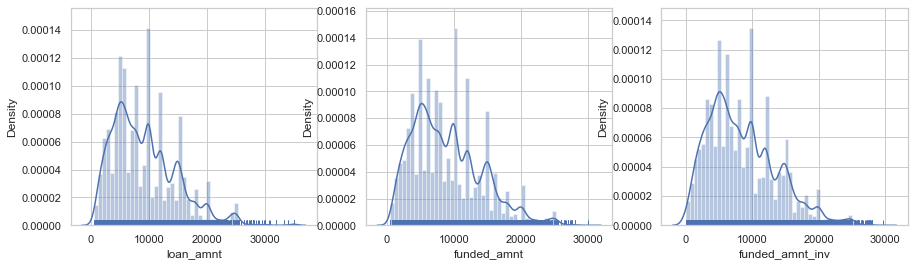

In [212]:
# Setting up the figure size of the plot
plt.figure(figsize=(15,4))

# Setting subplot index
plt.subplot(1,3,1)

# Distribution plot for loan_amt
sns.distplot(loan_df['loan_amnt'],rug = True)

# Setting subplot index
plt.subplot(1,3,2)

# Distribution plot for funded_amt
sns.distplot(loan_df['funded_amnt'],rug = True)

# Setting subplot index
plt.subplot(1,3,3)

# Distribution plot for funded_amt_inv
sns.distplot(loan_df['funded_amnt_inv'],rug = True)
plt.show()

### Observation
From above plots, we can infer that all the three variables plots looks similar, hence, we can take loan_amt for further analysis as this would be the final fund disburesed to the customer

### Analysing percentage of loan amount approved

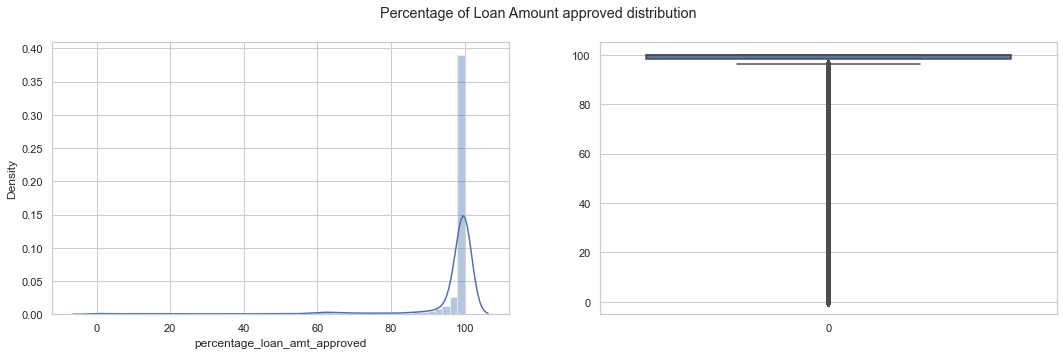

In [221]:
# Setting up the figure size of the plot
plt.figure(figsize=(18,5))

# Setting subplot index
plt.subplot(1,2,1)

# Histogram plot
sns.distplot(a=loan_df.percentage_loan_amt_approved)

# Setting subplot index
plt.subplot(1,2,2)

# Box plot
sns.boxplot(data=loan_df.percentage_loan_amt_approved)

plt.suptitle('Percentage of Loan Amount approved distribution')
plt.show()

### Observation
From above, we have infer that majority (80%) of customers got 100% of funded amount

## Analysing Loan amount 

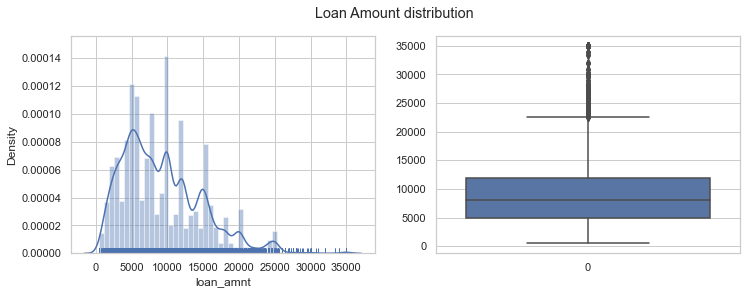

In [218]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))

#Setting subplot index
plt.subplot(1,2,1)

# Distribution plot
sns.distplot(a=loan_df.loan_amnt, rug=True)

plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=loan_df.loan_amnt)

#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

### Observations:
From the above plots, we can infer that more number of people took loan amount of 8000+, and also meadian of distribution is 8000. And very few people took more than 23000 loan amount.

## Analysing Interest Rate

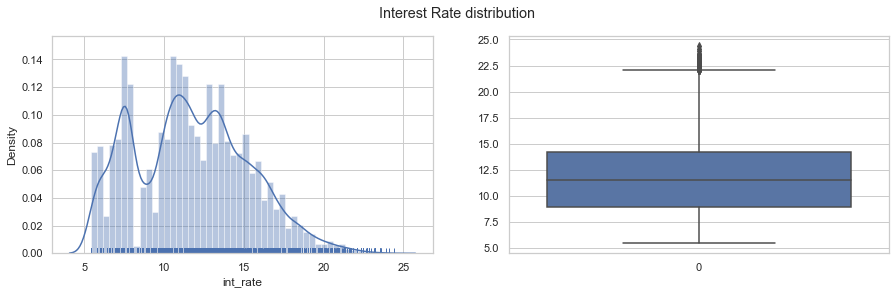

In [219]:
# Setting up the figure size of the plot
plt.figure(figsize=(12,4))

# Setting subplot index
plt.subplot(1,2,1)

# Distribution plot
sns.distplot(a=loan_df.int_rate, rug=True)

# Setting subplot index
plt.subplot(1,2,2)

# Box plot
sns.boxplot(data=loan_df.int_rate)

# Single title for both subplots.
plt.suptitle('Interest Rate distribution')
plt.show()

### Observation:
From above plots, we can infer that most of the customers comes under int rate bracket of 9 to 14.5%

## Analysing Installment
The monthly payment owed by the borrower if the loan originates.

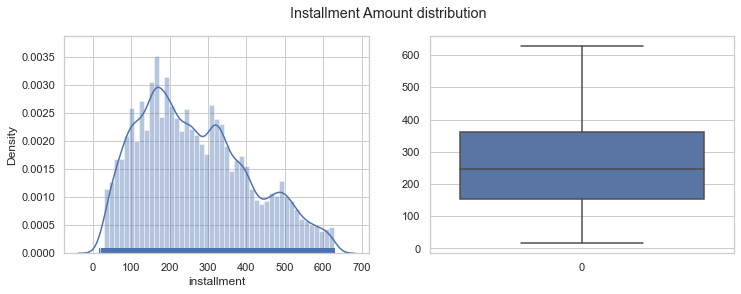

In [222]:
# Setting up the figure size of the plot
plt.figure(figsize=(12,4))

# Setting subplot index
plt.subplot(1,2,1)

# Distribution plot
sns.distplot(a=loan_df.installment, rug=True)

# Setting subplot index
plt.subplot(1,2,2)

# Box plot
sns.boxplot(data=loan_df.installment)

# Single title for both subplots.
plt.suptitle('Installment Amount distribution')
plt.show()

### Observation:
Most representative value for variable installment is 250

## Analysing Annual Income
The self-reported annual income provided by the borrower during registration.

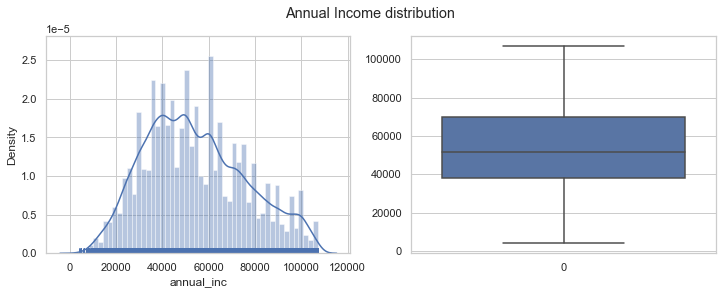

In [223]:
#Setting up the figure size of the plot
plt.figure(figsize=(12,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=loan_df.annual_inc, rug=True)

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(data=loan_df.annual_inc)

#Single title for both subplots.
plt.suptitle('Annual Income distribution')
plt.show()

### Observations:
From annual inc data, we can infer that most of the borrower's annual income are in range of 39k to 70k.

## Analysing dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

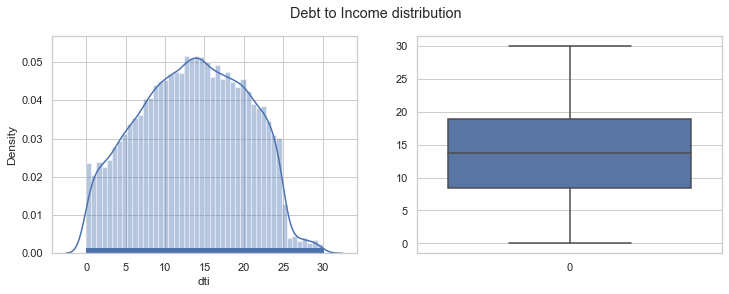

In [224]:
#Setting up the figure size of the plot
plt.figure(figsize=(12,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=loan_df.dti, rug=True)

#Setting subplot index
plt.subplot(1,2,2)

# Box plot
sns.boxplot(data=loan_df.dti)

#Single title for both subplots.
plt.suptitle('Debt to Income distribution')
plt.show()

### Observations:
From above plots, we can infer that there are no outliers and the distribution is very much similar to normal distribution.
This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

## Analysing Loan issue_d
The month which the loan was funded

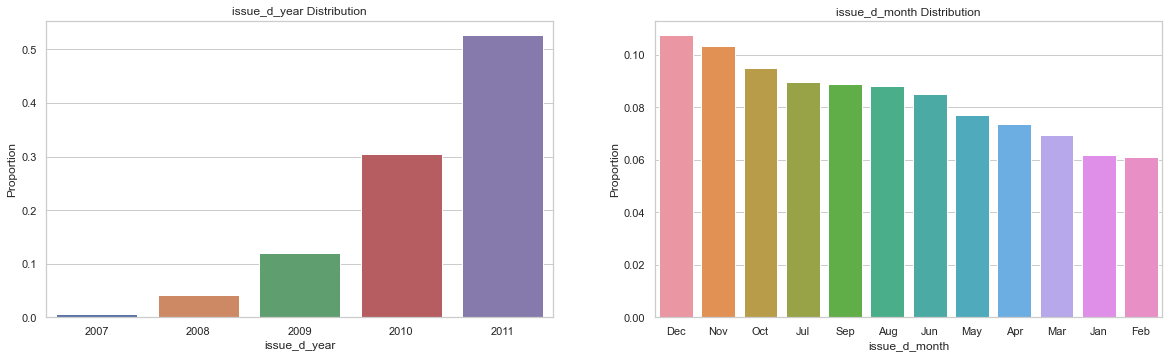

In [226]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

### Observations:
* The lending club has almost doubled loan issues every year.
* There are more issues of loan in last 3 months i.e., in the months of Oct, Nov and Dec.

## Analysing Employment length


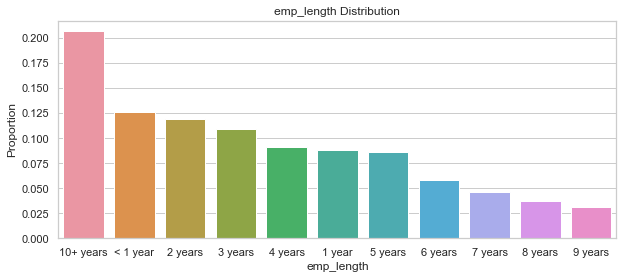

In [228]:
#Setting up the figure size of the plot
plt.figure(figsize=(10,4))

# Using temp variable
var = 'emp_length'

#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

#Distribution plot
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

### Observations:
From above plot, we can infer that majority of the customers are having more than 10yrs of employment

## Unordered Categorical Variants

## Analysing Loan Status
Current status of the loan


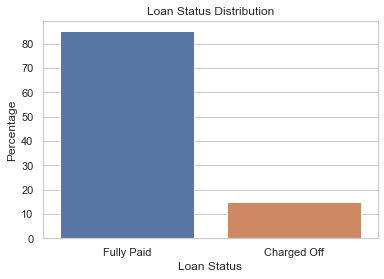

In [229]:
# Using temp variable
var = 'loan_status'

#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).mul(100).round(1).reset_index()

#Distribution plot
sns.barplot(data=prob_df, x="index", y="loan_status")
plt.xlabel("Loan Status")
plt.ylabel('Percentage')
plt.title('Loan Status Distribution')
plt.show()

### Observations:
From above bar plot, we can infer that 85% customers have fully paid whereas 15% have charged off

## Analysing Purpose of Loan
A category provided by the borrower for the loan request. 

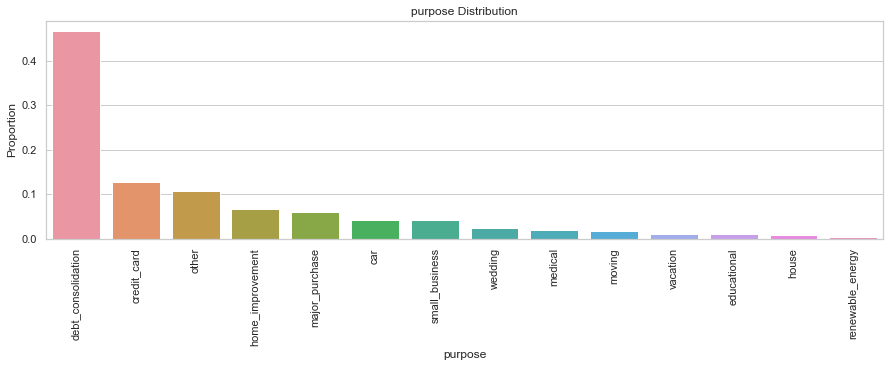

In [233]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

# Using temp variable
var = 'purpose'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

### Observations:
1. From above data, we can infer that majority of the customers took loan for  for debt consolidation and paying credit card bills.
2. Debt conslidation is also very high impling high charged off customers

## Analysing Home ownership

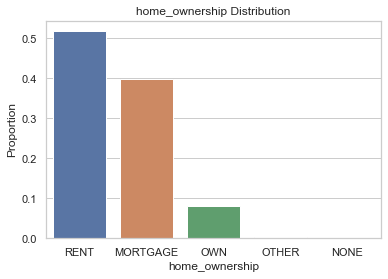

In [234]:
var = 'home_ownership'

#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

### Observations:
From above plot, we can infer that the loan borrowers are mostly having rented and mortgage houses.

## Ordered Categorical Variables

## Analysing Term
The number of payments on the loan. Values are in months and can be either 36 or 60.


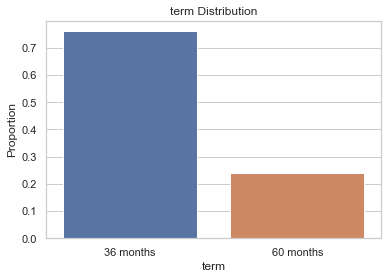

In [235]:
var = 'term'

#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

### Observations:
From above plot, we can infer that majority of customers opted for 36months term over 60months term

## Analysing Grade
LC assigned loan grade


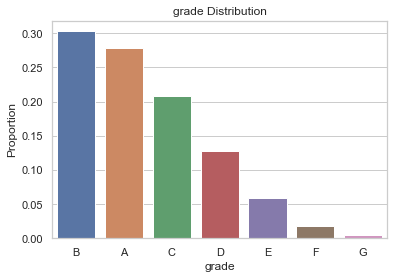

In [236]:
var = 'grade'

#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

### Observations:
From above plot, we can infer that majority of the customers fall under grade A & B

# Segmented Univariant Analysis

In segmented univariate analysis, we segment the categorical variables and then conduct univariate analysis across its categories

## Loan amount Vs Grade

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

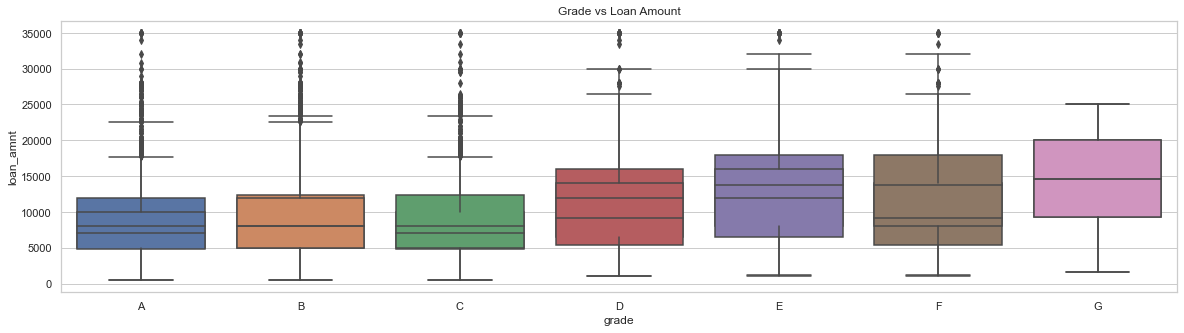

In [240]:
plt.figure(figsize=(20,5))

sns.boxplot(x='grade', y=loan_df.loan_amnt, data=loan_df)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_df.loan_amnt, order = grade_ord, data=loan_df)

### Observations:
From above boxplot, we can infer that Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing

## Loan amount Vs Term

Text(0.5, 1.0, 'Term vs Loan Amount')

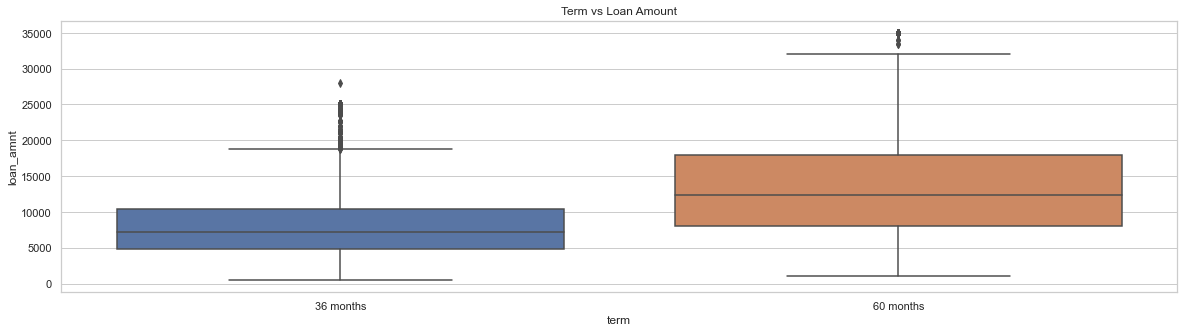

In [242]:
plt.figure(figsize=(20,5))

sns.boxplot(x='term', y=loan_df.loan_amnt, data=loan_df)
plt.title('Term vs Loan Amount')

### Observations:
From above, we can infer that higher amount loans have high tenure i.e, 60 months.

## Loan amount Vs Loan Status

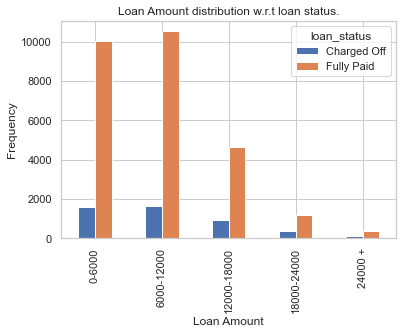

In [243]:
# Using binned loan amount
loan_df.groupby('loan_amnt_bin')['loan_status'].value_counts().unstack().plot(kind='bar')

plt.title("Loan Amount distribution w.r.t loan status.")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

### Observations:
From above we can infer that, under 14k most of the borrowers take the loan amount and charged off status is also high for those amount.

## Loan amount Vs Annual inc

<Figure size 1440x360 with 0 Axes>

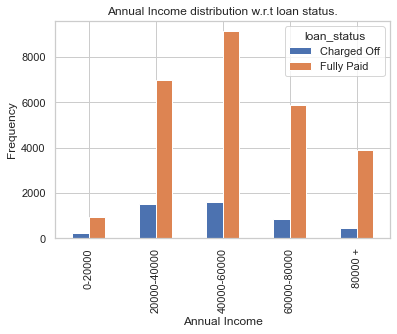

In [248]:
plt.figure(figsize=(20,5))

# Using binned annual inc
loan_df.groupby('annual_inc_bin')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.title("Annual Income distribution w.r.t Loan status.")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

### Observations:
From above bar chart, we can infer that, most of the customers' annual income is in the range of 40k to 60k.

Also, most of the customers who charged off have annual inc range of 2k to 60k

# Bivariate Analysis

## Analysing Annual Inc with other variables

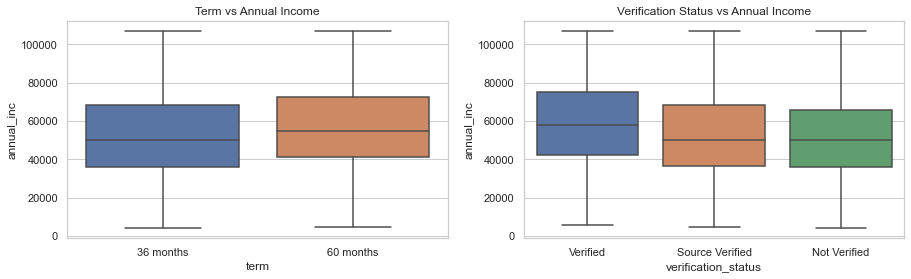

In [249]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(x="term", y="annual_inc", data=loan_df)
plt.title("Term vs Annual Income")

plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="annual_inc", data=loan_df)
plt.title("Verification Status vs Annual Income")
plt.show()

### Observations:
* On comparison of Annual inc Vs Term, we can infer that borrowers' having higher income consider 60months as term
* On comparison of Annual inc Vs Verification status, we can infer that borrower's having higher income are verified

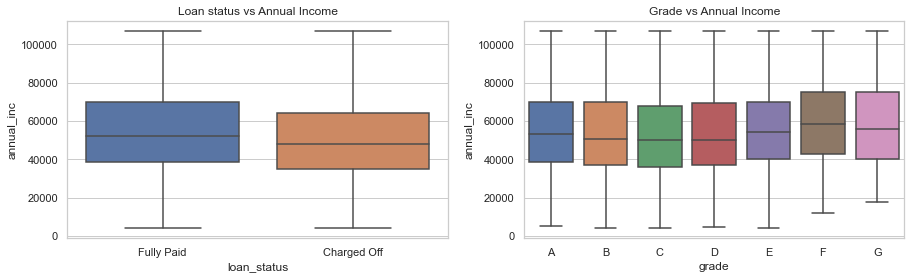

In [250]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="annual_inc", data=loan_df)
plt.title("Loan status vs Annual Income")

plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = loan_df["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="annual_inc", order= grade_order, data=loan_df)
plt.title("Grade vs Annual Income")
plt.show()

### Observations:
* On comparison of Annual inc Vs loan status, we can infer that borrowers' having higher annual inc are more who have fully paid the loan
* On comparison of Annual inc Vs grade, we can infer that borrowers' having higher annual inc are from higher grade i.e. F & G

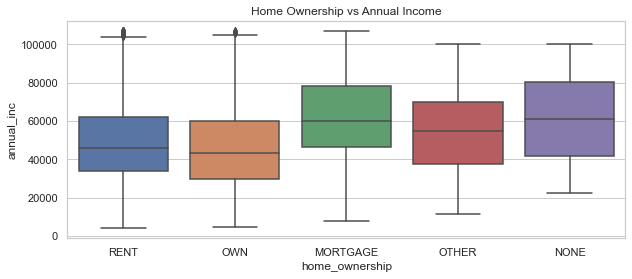

In [251]:
plt.figure(figsize=(10,4))

sns.boxplot(x="home_ownership", y="annual_inc", data=loan_df)
plt.title("Home Ownership vs Annual Income")
plt.show()

### Observations:
On comparison of Annual inc Vs loan status, we can infer that borrowers having home ownership status as mortgage are from higher annual inc bracket

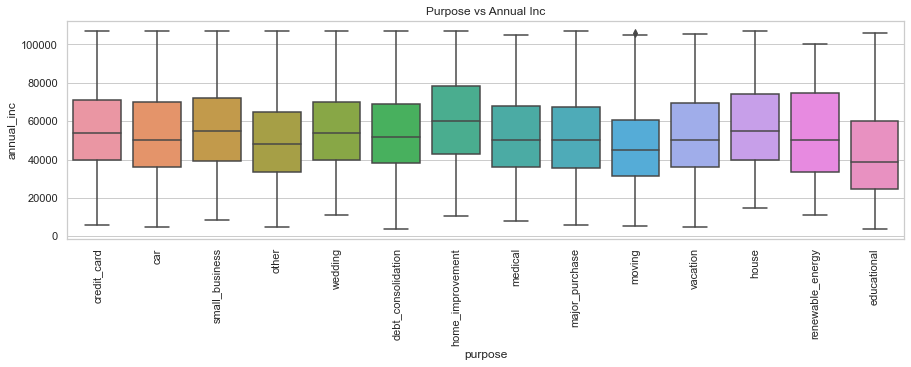

In [257]:
plt.figure(figsize=(15,4))

sns.boxplot(x="purpose", y="annual_inc", data=loan_df)
plt.title("Purpose vs Annual Inc")
plt.xticks(rotation=90)
plt.show()

### Observations:
On comparison of Annual Income vs Purpose variable, we can infer that, the borrowers who has high annual income are taking loans mostly for home improvement and small business.

## Analysing Interest Rate with other variables

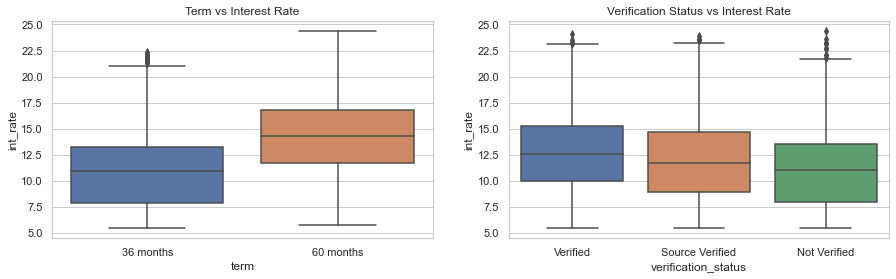

In [252]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(x="term", y="int_rate", data=loan_df)
plt.title("Term vs Interest Rate")

plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="int_rate", data=loan_df)
plt.title("Verification Status vs Interest Rate")
plt.show()

### Observations:
* On comparison of Term Vs Int rate, we can infer that interest rate is less for those who take loan for 36 months and high for 60 months.
* On comparison of Verification status Vs Int rate, we can infer that verified borrower gets more loan at higher interest rate compared to others.

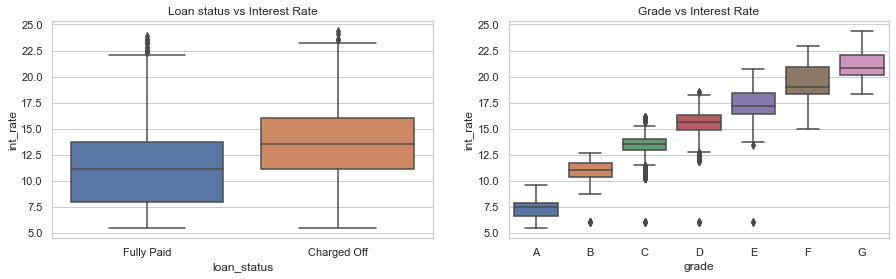

In [254]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="int_rate", data=loan_df)
plt.title("Loan status vs Interest Rate")

plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = loan_df["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="int_rate", order= grade_order, data=loan_df)
plt.title("Grade vs Interest Rate")
plt.show()

### Observations:
* On comparison of Loan status Vs Int rate, we can infer that borrowers with higher int rate are charged off
* On comparison of Grade Vs Int rate, we can infer that as the grade decreases, interest rate is also increasing.

Text(0.5, 1.0, 'Home Ownership vs Interest Rate')

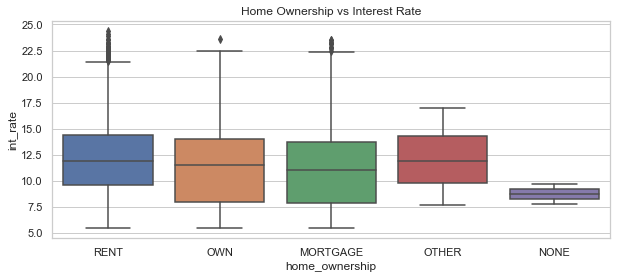

In [255]:
plt.figure(figsize=(10,4))

sns.boxplot(x="home_ownership", y="int_rate", data=loan_df)
plt.title("Home Ownership vs Interest Rate")

### Observations:
* On comparison of home ownership Vs Int rate, we can infer that borrowers inrent are getting higher int rate comparatively to own and mortgage

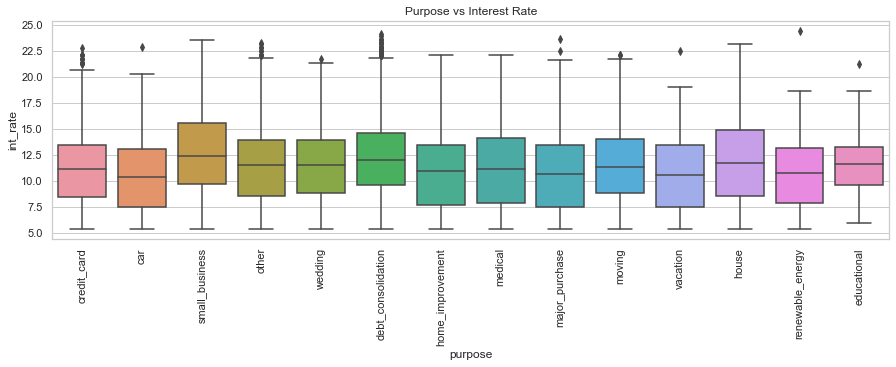

In [256]:
plt.figure(figsize=(15,4))

sns.boxplot(x="purpose", y="int_rate", data=loan_df)
plt.title("Purpose vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

### Observations:
On comparison of purpose vs interest rate, we can infer that, small business, debt consolidation and house loan are geeting loan at high interest rate than others.

# Multivariate Analysis

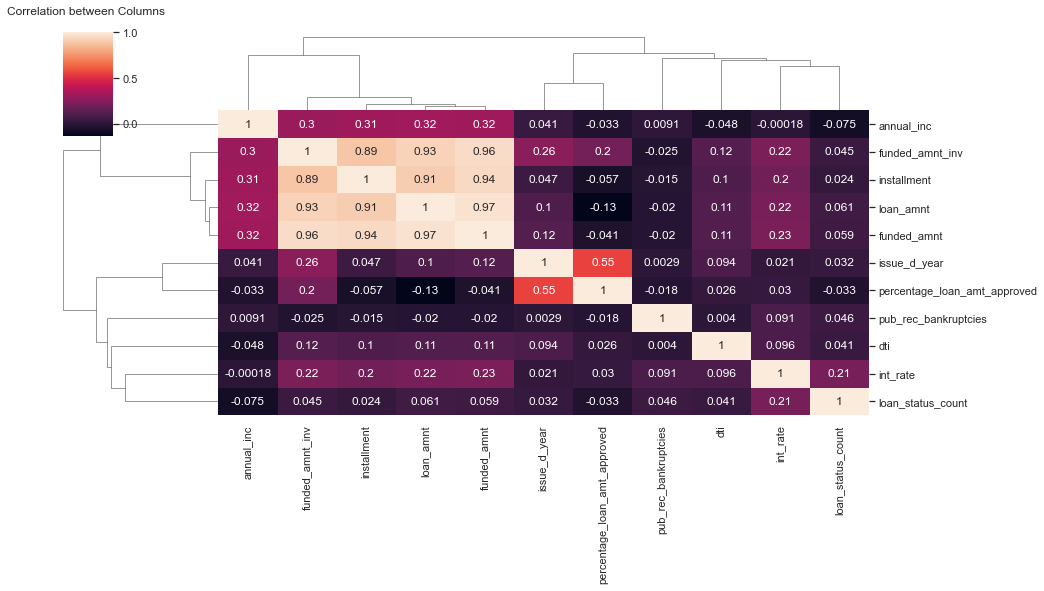

In [259]:
#finding correlation matrix
data_correlation = loan_df.corr()

#plotting correaltion matrix on clustermap
sns.clustermap(data_correlation,annot=True,figsize=(14, 8))
plt.title("Correlation between Columns \n")
plt.show()

### Observations:
* Annual Inc and Dti are negatively correlated
* Loan amount, funded_amt, funded_amt_inv and installment are strongly correlated

# Recommendations:
1. Lending Club should be wary of the loans where the purpose is Small Business as the percentage of a loan being charged off is maximum 27.1%. 
2. Lending club should be extra cautious giving loans for higher term as they have more chances of deafulting
3. Higher the loan amount, the higher the chances of loan being charged off. Therefore Lending Company should consider accepting loans of lower amount and be cautious for higher amount. Hence the risk factor is low for lending club.
4. Lending Club should consider accepting more loans from applicants whose annual income is greater than 100000 as their probablity of charge off is minimum.
5. Lending Club should consider accepting more loans where interest rate is less than 7.5% as their probablity of charge off is minimum.
6. Lending Club should consider accepting more loans of grade A and B. It should be cautious of loans falling in grades E,F and G
7. Lending Club should consider accepting more loans from people who owns a house.